In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [3]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # transforme un charactère en index

In [4]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()} # transforme un index en charactère

In [5]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [6]:
stoi['e']

5

In [7]:
N = torch.zeros(27,27)
for w in words:
    w = '.' + w + '.'
    for i in range(len(w)-1) : 
        N[stoi[w[i]],stoi[w[i+1]]] +=1


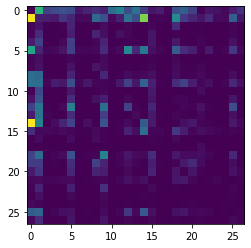

In [8]:
# display the matrix
plt.imshow(N)

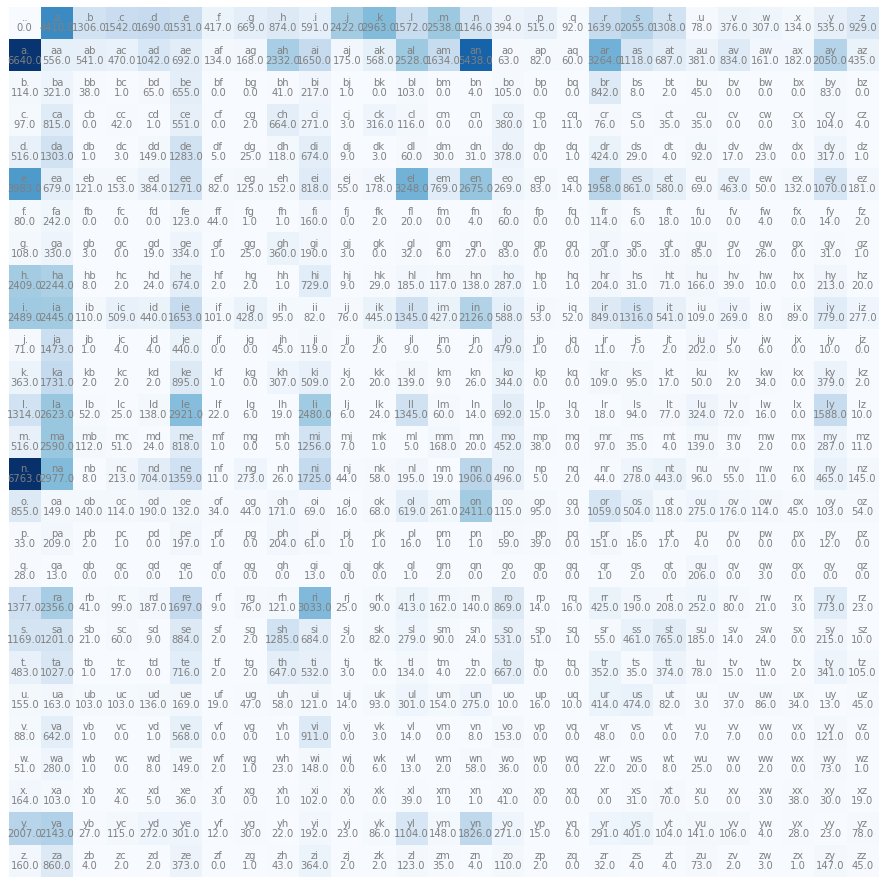

In [9]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [10]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [11]:
P = N/N.sum(axis=1, keepdim=True)

In [12]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = p.multinomial(1).item()
        if(itos[ix]=='.'): break
        out.append(itos[ix])
    print(''.join(out))

de
comeaha
h
be
jisserifl
r
rilevema
iviys
jusiarty
vinyrallyarasia
ben
jon
ch
a
selamali
sti
kalinadevetari
rioranntik
keran
pson
pe
diaiosali
ahe
ma
ga
ngwahar
eiariaiazaqujanede
an
myseni
kem


In [13]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [14]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [15]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27,27, generator=g)
W.requires_grad=True

# training loop
import torch.nn.functional as F
for k in range(20): # in range(nb_epoch)
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # encode xs with F.one_hot
    logits = xenc @ W 
    counts = F.softmax(logits, dim=1) # logits.exp() 
    probs = counts[torch.arange(0,228146),ys]  # counts/sum(counts) normalisation comme exo 1
    loss = - torch.mean(torch.log(probs)) 

    # backward pass
    W.grad = None  
    loss.backward()

    # update
    W.data -= 0.01 * W.grad  # learning rate * grad
    W.grad.zero_()  

    print(loss.item())

3.758953332901001
3.758862257003784
3.758770704269409
3.7586798667907715
3.7585883140563965
3.7584967613220215
3.7584052085876465
3.758314371109009
3.758222818374634
3.758131265640259
3.758039712905884
3.757949113845825
3.7578577995300293
3.7577664852142334
3.7576754093170166
3.7575843334198
3.757493019104004
3.757401704788208
3.757310628890991
3.7572195529937744


In [16]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        counts = logits.exp()
        probs = counts / counts.sum() # softmax function
        ix = torch.multinomial(torch.tensor(probs), 1).item() # sampling the next character index based on the probabilities computed from the model's output logits
        if ix == 0: # break if the character is the point
            break
        out.append(itos[ix])
    print(''.join(out))

wmykkrgn
znouc
ydbuslxfhs
pxgkpokgdq
hwaavmhbpb
zouccevmra
zeafbus
yuqwlw
mfiialuwtm
oksz


C:\Users\elelo\AppData\Local\Temp/ipykernel_11464/1835521070.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ix = torch.multinomial(torch.tensor(probs), 1).item() # sampling the next character index based on the probabilities computed from the model's output logits


In [17]:
# Exercise 3: homework (*) extend the previous model to trigram

In [18]:
# create a training set for trigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:-1], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1, ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [19]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, 27, generator=g)
W.requires_grad=True

# training loop
import torch.nn.functional as F
for k in range(20): # in range(nb_epoch)
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = torch.einsum('bik,kjl->bij', xenc, W)  # einsum to make a matrix multiplication
    counts = F.softmax(logits, dim=2) # softmax along the third dimension
    probs = counts[torch.arange(0, 196113), :, ys]  # Adjusted indexing for probabilities
    loss = - torch.mean(torch.log(probs))

    # backward pass
    W.grad = None  
    loss.backward()

    # update
    W.data -= 0.01 * W.grad  # learning rate * grad
    W.grad.zero_()  

    print(loss.item())

11.831746101379395
11.815658569335938
11.799592971801758
11.783548355102539
11.767524719238281
11.7515230178833
11.735544204711914
11.719585418701172
11.703646659851074
11.687729835510254
11.671834945678711
11.655960083007812
11.640105247497559
11.624272346496582
11.608457565307617
11.592667579650879
11.576894760131836
11.561142921447754
11.545411109924316
11.529699325561523


In [20]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [21]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# hyper parameters :
block_size = 3
emb_size = 300
batch_size = 3000
learning_rate = 10
nb_epochs = 500
hidden_units = 60

In [23]:
# build the dataset (do not change this code)

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [24]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, emb_size, generator=g)

# Therefore there are really two hidden layers: the shared word features layer C (embedding layer), which has no non-linearity and the ordinary hyperbolic tangent hidden layer. 

# first hidden layer : weights and biases

W1 = torch.randn(hidden_units, block_size*emb_size, generator=g) # hidden_units = 60 for example
b1 = torch.randn(hidden_units, generator=g)

# second hidden layer weights and biases
W2 = torch.randn(27, block_size*emb_size, generator=g)
b2 = torch.randn(27, generator=g)

U = torch.randn(27, hidden_units, generator=g)

parameters = [C, W1, b1, W2, b2, U]
for p in parameters:
    p.requires_grad = True


In [25]:
# init weights (use torch.nn.init)
# paper : Random initialization of the word features was done (similarly to initialization of neural network weights)
b1 = torch.empty(hidden_units)
torch.nn.init.normal_(b1, mean=0, std=0.01)

b2 = torch.empty(27) # output size
torch.nn.init.normal_(b2, mean=0, std=0.01)

W1 = torch.empty(hidden_units, block_size*emb_size)
torch.nn.init.normal_(W1, mean=0, std=0.01)

W2 = torch.empty(27, block_size*emb_size)
torch.nn.init.normal_(W2, mean=0, std=0.01)

tensor([[-0.0059, -0.0108, -0.0048,  ..., -0.0108,  0.0028,  0.0026],
        [ 0.0005,  0.0174,  0.0188,  ...,  0.0046, -0.0004, -0.0075],
        [ 0.0023,  0.0020, -0.0134,  ...,  0.0145,  0.0065,  0.0138],
        ...,
        [-0.0075,  0.0109, -0.0014,  ..., -0.0011,  0.0176,  0.0159],
        [-0.0109,  0.0040, -0.0185,  ...,  0.0011,  0.0053, -0.0114],
        [-0.0055, -0.0114, -0.0211,  ...,  0.0119,  0.0001,  0.0108]])

In [26]:
stepi = []
lossi = []

for p in parameters:
    p.requires_grad = True

In [36]:
second_step.size()

torch.Size([1, 27])

In [27]:
# training loop (use the cross-entropy loss)

for i in range(nb_epochs):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,)) # we take 3000 random index 
    X_batch = X_train[ix] # data batch reduced to 3000 sample
    Y_batch = Y_train[ix]

    # forward pass
    # y = b+Wx+U*tanh(d +Hx) with x the embeddings
    emb = C[X_batch].view(batch_size, -1)  # embedding of the batch data
    first_step = torch.tanh(torch.einsum('ij,kj->ik', emb, W1) + b1)
    second_step = torch.einsum('ij,kj->ik', first_step, U)

    logits = b2 + torch.einsum('ij,kj->ik', emb, W2) + second_step
    loss = F.cross_entropy(logits, Y_batch)

    # backward pass
    for p in parameters:
        p.grad = None
        p.grad = torch.zeros_like(p)
    loss.backward()
    
    # update
    for p in parameters:
        p.data -= learning_rate * p.grad 
        p.grad.zero_() 

    stepi.append(i)
    lossi.append(loss.log10().item())
    # print(i, loss)

print(f'the last loss is {lossi[-1]}')

the last loss is 0.36169081926345825


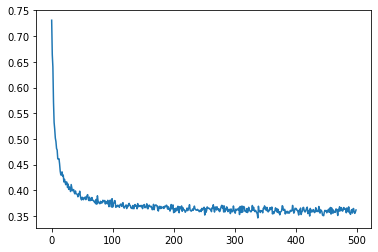

In [28]:
plt.plot(stepi, lossi)

In [29]:
# compute the train and val loss

In [30]:
with torch.no_grad():
    emb_test = C[X_test].view(X_test.shape[0], -1)
    first_step_test = torch.tanh(torch.einsum('ij,kj->ik', emb_test, W1) + b1)
    second_step_test = torch.einsum('ij,kj->ik', first_step_test, U)
    logits_test = b2 + torch.einsum('ij,kj->ik', emb_test, W2) + second_step_test
    loss_test = F.cross_entropy(logits_test, Y_test)

    print(f'The test loss is {loss_test.item()}')

The test loss is 2.288925886154175


In [31]:
# compute the train and val loss.  h
# here are the initial results I got for h=50 and 500 epochs : train loss = 0.59 and test loss = 4.44
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.
# With learning rate=10, I have train loss=0.36 and test loss=2.29

In [32]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:

      emb = C[torch.tensor([context])] # (1,block_size,d)
      emb = emb.view(1, -1) # block_size * d
      
      first_step = torch.tanh(torch.einsum('ij,kj->ik', emb, W1) + b1)
      second_step = torch.einsum('ij,kj->ik', first_step, U)
      logits = b2 + torch.einsum('ij,kj->ik', emb, W2) + second_step

      probs = F.softmax(logits, dim=1)

      ix = torch.multinomial(probs, num_samples=1, generator=g).item()

      context = context[1:] + [ix]  # update context
      out.append(ix)  # Ajouter le caractère échantillonné à la sortie

      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

jhyla.


onaied.
jahcersemylen.
jalon.
laj.
jadylina.
mai.
ar.
aly.
alan.
aeyi.
tussia.
zilyo.
che.
sai.
lepa.
baslai.
sanivonilley.
solis.
ello.


In [33]:
# Exercise 5 homework (*): add batchnorm to your network and report the results
# Batch norm is added between the linear layer and the non-linearity
# How many parameters does this add to your network?


Batch normalisation : 


![OpenAI Logo](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*VsN_9_AN2ji8hCZYSTTV0w.png)

So we will juste do the scale and shift step as we have already normalized the other parametrs.

In [48]:
# Initialize batch normalization parameters for the two layers

gamma1 = torch.ones(hidden_units)
beta1 = torch.zeros(hidden_units)

gamma2 = torch.ones(27)
beta2 = torch.zeros(27)

# List of all parameters
parameters =  [C, W1, b1, W2, b2, U, gamma1, beta1, gamma2, beta2]

# training
for i in range(nb_epochs):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,)) # we take 3000 random index 
    X_batch = X_train[ix] # data batch reduced to 3000 sample
    Y_batch = Y_train[ix]

    # Forward pass
    emb = C[X_batch].view(batch_size, -1)  # embedding of the batch data
    first_step = torch.tanh(torch.einsum('ij,kj->ik', emb, W1) + b1)
    first_step = gamma1 * first_step + beta1 # batchnorm of the affine transformation

    second_step = torch.einsum('ij,kj->ik', first_step, U)

    logits = b2 + torch.einsum('ij,kj->ik', emb, W2) + second_step
    logits = gamma2 * logits + beta2 # batchnorm of the affine transformation

    loss = F.cross_entropy(logits, Y_batch)

    # Backward pass
    for p in parameters:
        p.grad = None
        p.grad = torch.zeros_like(p)
    loss.backward()
    
    # Update
    for p in parameters:
        p.data -= learning_rate * p.grad 
        p.grad.zero_() 

    stepi.append(i)
    lossi.append(loss.log10().item())
    # print(i, loss)

print(f'The last loss is {lossi[-1]}')


The last loss is 0.3568434417247772


In [49]:
with torch.no_grad():
    emb_test = C[X_test].view(X_test.shape[0], -1)
    first_step_test = torch.tanh(torch.einsum('ij,kj->ik', emb_test, W1) + b1)
    second_step_test = torch.einsum('ij,kj->ik', first_step_test, U)
    logits_test = b2 + torch.einsum('ij,kj->ik', emb_test, W2) + second_step_test
    loss_test = F.cross_entropy(logits_test, Y_test)

    print(f'The test loss is {loss_test.item()}')

The test loss is 2.2744414806365967


Same results (a little bit better) but training time is reduced by two.  We added 4 new parameters.